In [2]:
from bs4 import BeautifulSoup
import urllib.request
import csv

<h3>1. Data Scraping<h3/>

In [3]:
urlpage =  'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [4]:
page = urllib.request.urlopen(urlpage)
soup = BeautifulSoup(page, 'html.parser')

In [5]:
# Find the data table on wiki page
table = soup.find('table', attrs={'class': 'wikitable sortable'})
results = table.find_all('tr')
print('Number of results', len(results))

Number of results 181


In [6]:
# Generate rows as index of the dataframe
rows = []
rows.append(['Postal Code', 'Borough', 'Neighbor'])
print(rows)

[['Postal Code', 'Borough', 'Neighbor']]


In [7]:
# Writing the data to dataframe 
for result in results:
    # find all columns per result
    data = result.find_all('td')
    # check that columns have data 
    if len(data) == 0: 
        continue
    # write columns to variables
    pos = data[0].get_text()
    bor = data[1].get_text()
    neigh = data[2].get_text()
    rows.append([pos, bor, neigh])

<h3> 2. Write Data to csv File<h3/>

In [8]:
# Write the dataframe to a csv file
with open('TNeigh.csv','w', encoding="utf-8") as f_output:
    csv_output = csv.writer(f_output)
    csv_output.writerows(rows)

In [9]:
import pandas as pd
f1 = pd.read_csv('TNeigh.csv')

In [10]:
f1.head()

,Postal Code,Borough,Neighbor
0,M1A\r\n,Not assigned\r\n,Not assigned\r\n
1,M2A\r\n,Not assigned\r\n,Not assigned\r\n
2,M3A\r\n,North York\r\n,Parkwoods\r\n
3,M4A\r\n,North York\r\n,Victoria Village\r\n
4,M5A\r\n,Downtown Toronto\r\n,"Regent Park, Harbourfront\r\n"


In [11]:
f1.shape

(180, 3)

Necessary data cleanups

In [12]:
# Clean the unnecessary symbols
import re
for i in f1:
    f1[i] = f1[i].astype(str).str.rstrip()

In [13]:
f1.head()

,Postal Code,Borough,Neighbor
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [14]:
# Get the indexs of all not assigned values on Borough column
indexNames = f1[f1['Borough'] == 'Not assigned'].index

In [15]:
# Drop the not assigned values
f1.drop(indexNames, inplace = True)

<p5>Shape of the data after cleanup<p5/>

In [16]:
f1.shape

(103, 3)

In [17]:
f1.head()

,Postal Code,Borough,Neighbor
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [18]:
indexNames2 = f1[f1['Neighbor'] == 'Not assigned'].index
indexNames2

Int64Index([], dtype='int64')

<h3> 3. Merge Data Based on Postal Code<h3/>

In [19]:
# Group the data with same column values and add up the Neighbor column
f1 = f1.groupby(['Postal Code', 'Borough'])['Neighbor'].apply(','.join).reset_index()

In [20]:
f1.shape

(103, 3)

In [21]:
f1.head()

,Postal Code,Borough,Neighbor
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [22]:
f1.to_csv('TNeigh.csv')

<p4>Merge data with the geo information in another dataset by Postal Code<p4/>

In [23]:
f2 = pd.read_csv('Geospatial_Coordinates.csv')

In [24]:
f2.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [25]:
f3 = f1.merge(f2, on="Postal Code", left_index=True, right_index=True)

In [26]:
f3.head()

,Postal Code,Borough,Neighbor,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [27]:
f3.shape

(103, 5)

<h3> 4. Visualization<h3/>

In [28]:
lat = f3['Latitude'].values
lon = f3['Longitude'].values
Neigh = f3['Neighbor'].str.count('\w+').values

In [36]:
lon.mean()

-79.39715291165048

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

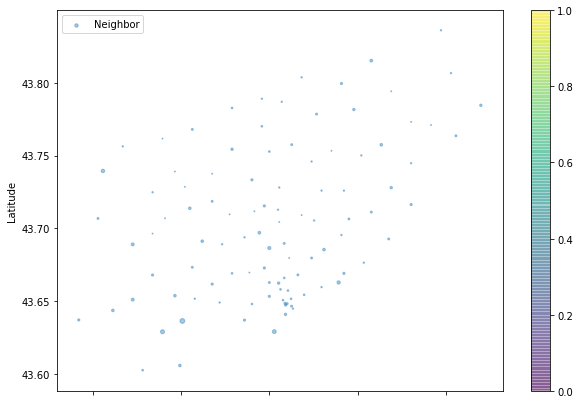

In [34]:
# Plot the number of neighborhood by the latitude and longitude
f3.plot(kind="scatter", x="Longitude", y="Latitude",
    s=f3['Neighbor'].str.count('\w+').values, label="Neighbor", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [31]:
conda install -c conda-forge basemap

Solving environment: ...working... done

# All requested packages already installed.


C:\Users\kk>if exist C:\Users\kk\anaconda3\Library\share\proj\copyright_and_licenses.csv (
rem proj-data is installed because its license was copied over  
 
)  else () 

Note: you may need to restart the kernel to use updated packages.


In [38]:
conda install -c conda-forge basemap-data-hires

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\kk\anaconda3

  added / updated specs:
    - basemap-data-hires


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    basemap-data-hires-1.2.1   |                0       105.4 MB  conda-forge
    ------------------------------------------------------------
                                           Total:       105.4 MB

The following NEW packages will be INSTALLED:

  basemap-data-hires conda-forge/win-64::basemap-data-hires-1.2.1-0




basemap-data-hires-1 | 105.4 MB  |            |   0% 
basemap-data-hires-1 | 105.4 MB  |            |   0% 
basemap-data-hires-1 | 105.4 MB  | 6          |   6% 
basemap-data-hires-1 | 105.4 MB  | #6         |  16% 
basemap-data-hires-1 | 105.4 MB  | ##6        |  26% 
basemap-data-hires-1 | 105.4 MB  | ###3       |  34% 
basemap-data-hires-1 | 105.4 MB  | ####1    

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

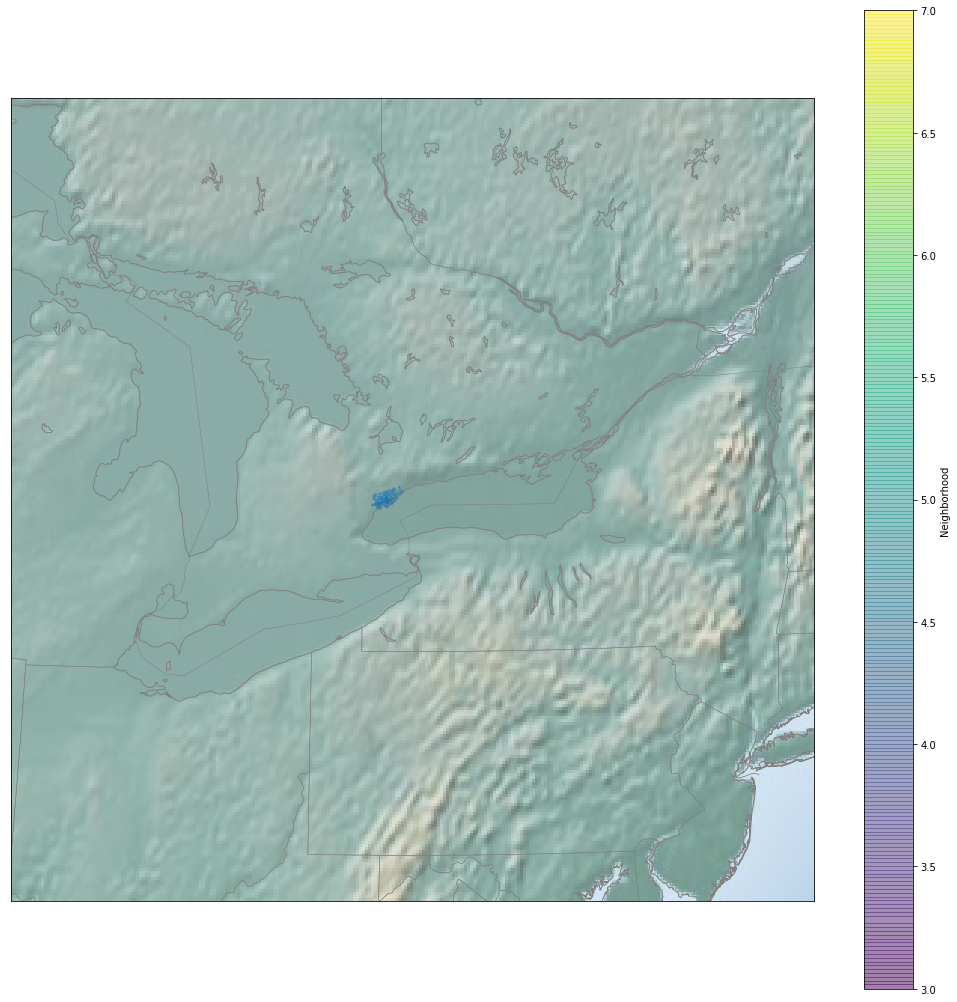

In [50]:

fig = plt.figure(figsize=(18, 18))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=43.7, lon_0=-79,
            width=1E6, height=1E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter(lon, lat, latlon=True, s=f3['Neighbor'].str.count('\w+').values,
          cmap='Reds', alpha=0.5)

plt.colorbar(label=r'Neighborhood')
plt.clim(3, 7)